In [1]:
%matplotlib inline

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage.io import imread, imread_collection, imshow, imshow_collection
from skimage.filters import threshold_otsu
from skimage.transform import resize, rotate

from scipy.signal import convolve2d
from scipy.fft import fft2, fftshift

# Working with Images

## Image processing

## Read image

In [3]:
cat_image = imread("felis_taxonomy_cats/domestic-cat/dc (17).jpg") # read image

In [119]:
cat_image.nbytes # bytes of image

150975

In [4]:
cat_image

array([[[ 64,  88,  90],
        [ 59,  83,  85],
        [ 51,  75,  77],
        ...,
        [ 39,  41,  27],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 58,  82,  84],
        [ 55,  79,  81],
        [ 49,  73,  75],
        ...,
        [ 39,  41,  27],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 50,  74,  76],
        [ 49,  73,  75],
        [ 46,  70,  72],
        ...,
        [ 37,  39,  25],
        [ 37,  39,  25],
        [ 37,  39,  25]],

       ...,

       [[118, 169,  64],
        [117, 168,  65],
        [124, 172,  70],
        ...,
        [164, 201,  85],
        [178, 215,  99],
        [190, 227, 111]],

       [[131, 182,  77],
        [125, 176,  73],
        [125, 173,  71],
        ...,
        [172, 207,  91],
        [186, 221, 105],
        [199, 234, 118]],

       [[139, 190,  85],
        [132, 183,  80],
        [129, 177,  75],
        ...,
        [177, 210,  95],
        [191, 224, 109],
        [203, 236, 121]]

In [5]:
cat_image.shape # (height, weight, number of channels)

(183, 275, 3)

In [6]:
cat_image[:, :, 0] # return all values from red channel

array([[ 64,  59,  51, ...,  39,  39,  39],
       [ 58,  55,  49, ...,  39,  39,  39],
       [ 50,  49,  46, ...,  37,  37,  37],
       ...,
       [118, 117, 124, ..., 164, 178, 190],
       [131, 125, 125, ..., 172, 186, 199],
       [139, 132, 129, ..., 177, 191, 203]], dtype=uint8)

In [7]:
all_domestic_cats_collection = imread_collection("felis_taxonomy_cats/domestic-cat/*") # read all images from 'domestic-cat' directory

In [8]:
all_domestic_cats_collection

In [9]:
all_domestic_cats = list(all_domestic_cats_collection) # return all images from 'domestic-cat' directory

In [27]:
# all_domestic_cats[0] # return first image

In [10]:
len(all_domestic_cats) 

64

In [11]:
(all_domestic_cats[16] == cat_image).all() # the image is the same 

True

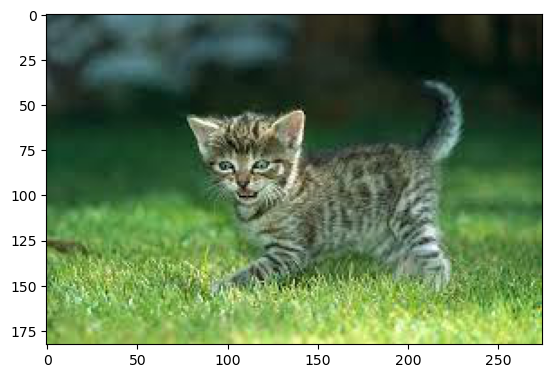

In [13]:
plt.imshow(cat_image) # return the image

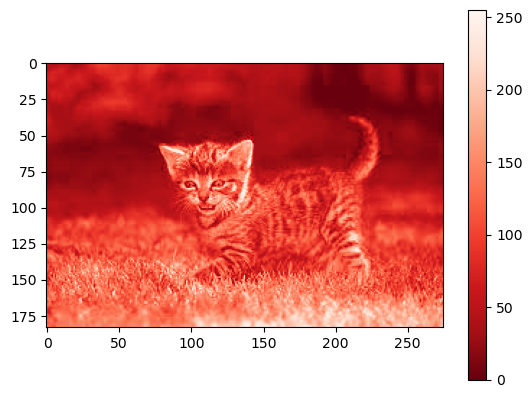

In [14]:
plt.imshow(cat_image[:, :, 0], cmap = "Reds_r") # red channel
plt.colorbar()
plt.show()
# darker -> lower values, lighter -> higher values

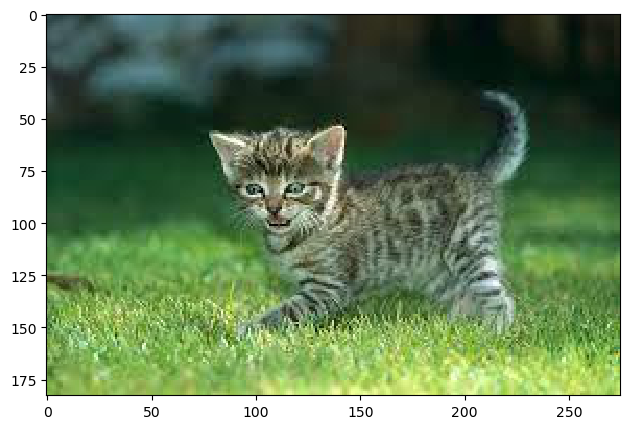

In [15]:
imshow(cat_image)

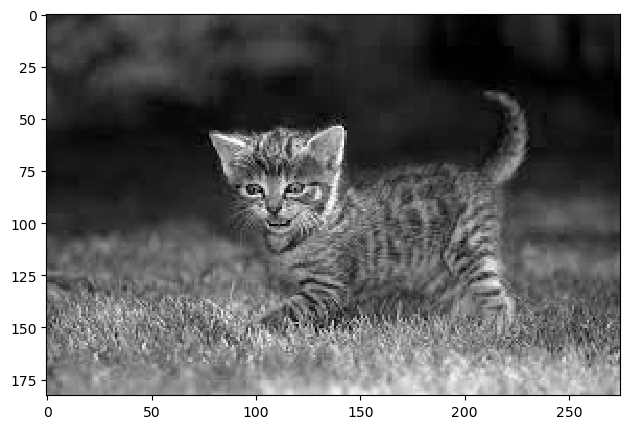

In [16]:
imshow(cat_image[:, :, 0]) # red channel

## Slicing

In [94]:
cropped_cat_image = cat_image[50:110, 70:150] # crop part of image

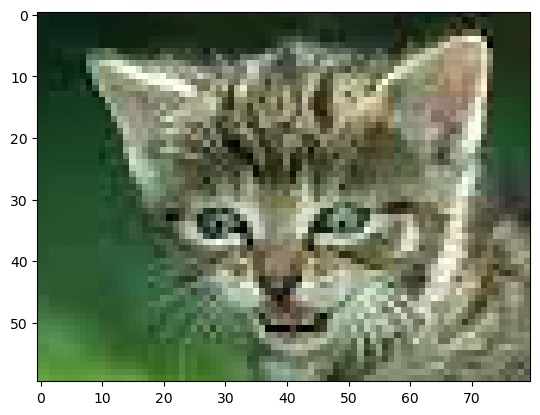

In [95]:
plt.imshow(cropped_cat_image) 

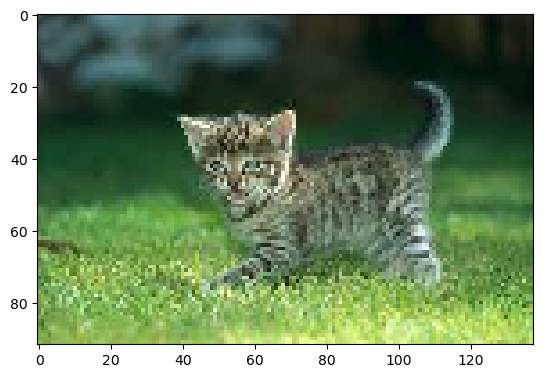

In [19]:
plt.imshow(cat_image[::2, ::2]) # make the image 4 times smaller 

In [20]:
cat_image.dtype # unsigned integer, 8 bits 

dtype('uint8')

In [21]:
cat_image.astype(float).dtype

dtype('float64')

In [22]:
cat_image

array([[[ 64,  88,  90],
        [ 59,  83,  85],
        [ 51,  75,  77],
        ...,
        [ 39,  41,  27],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 58,  82,  84],
        [ 55,  79,  81],
        [ 49,  73,  75],
        ...,
        [ 39,  41,  27],
        [ 39,  41,  27],
        [ 39,  41,  27]],

       [[ 50,  74,  76],
        [ 49,  73,  75],
        [ 46,  70,  72],
        ...,
        [ 37,  39,  25],
        [ 37,  39,  25],
        [ 37,  39,  25]],

       ...,

       [[118, 169,  64],
        [117, 168,  65],
        [124, 172,  70],
        ...,
        [164, 201,  85],
        [178, 215,  99],
        [190, 227, 111]],

       [[131, 182,  77],
        [125, 176,  73],
        [125, 173,  71],
        ...,
        [172, 207,  91],
        [186, 221, 105],
        [199, 234, 118]],

       [[139, 190,  85],
        [132, 183,  80],
        [129, 177,  75],
        ...,
        [177, 210,  95],
        [191, 224, 109],
        [203, 236, 121]]

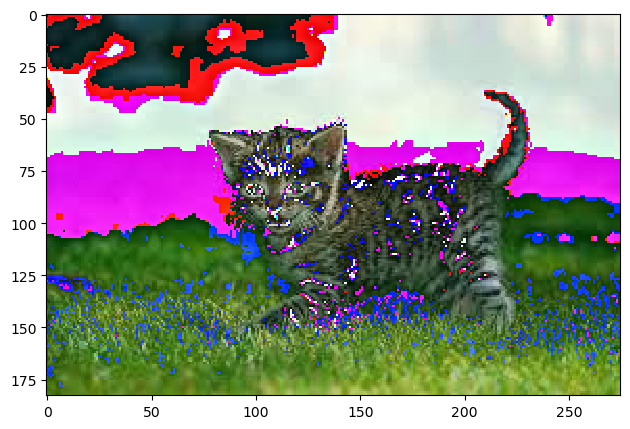

In [23]:
imshow((cat_image + 200).astype("uint8"))

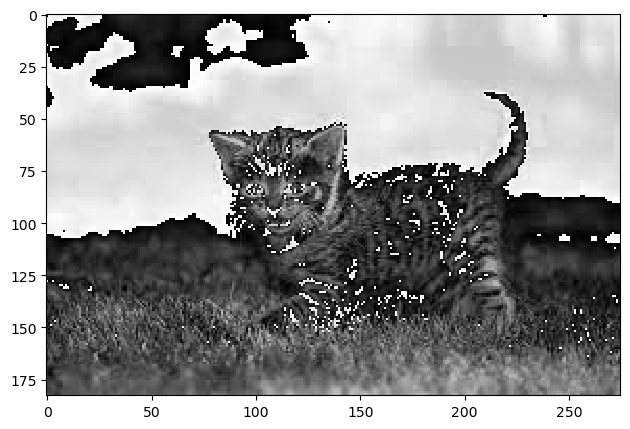

In [24]:
imshow((cat_image[:, :, 0] + 200).astype("uint8"))

C:\Users\USER\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


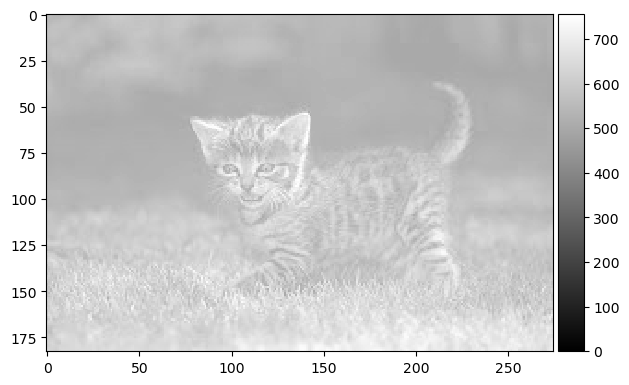

In [25]:
imshow(cat_image[:, :, 0] + 500, vmin = 0, vmax = 500 + 256, cmap = "grey")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


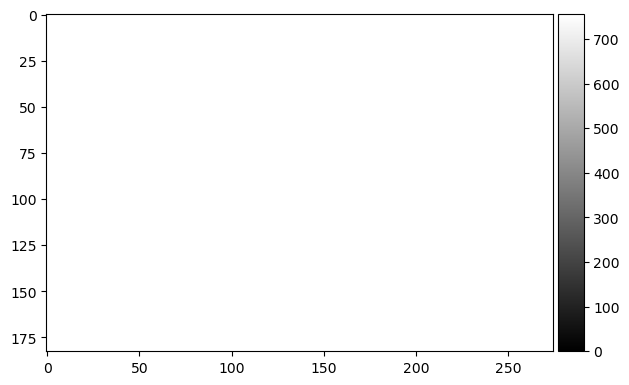

In [26]:
imshow(cat_image + 500, vmin = 0, vmax = 500 + 256, cmap = "grey")
# it expects to be [0, 1] or [0, 255]

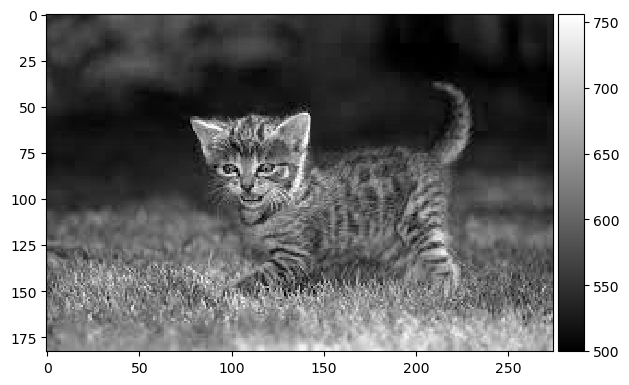

In [27]:
imshow(cat_image[:, :, 0] + 500, vmin = 500, vmax = 500+256, cmap = "grey")

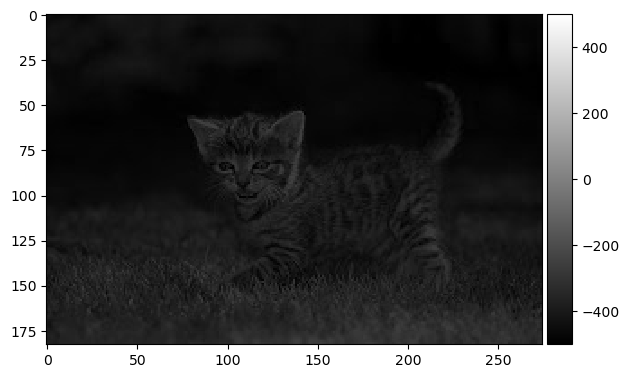

In [28]:
imshow((cat_image[:, :, 0]).astype(int) - 500, cmap = "grey")

In [29]:
(cat_image[:, :, 0]).astype(int) - 500 # numbers can be negative

array([[-436, -441, -449, ..., -461, -461, -461],
       [-442, -445, -451, ..., -461, -461, -461],
       [-450, -451, -454, ..., -463, -463, -463],
       ...,
       [-382, -383, -376, ..., -336, -322, -310],
       [-369, -375, -375, ..., -328, -314, -301],
       [-361, -368, -371, ..., -323, -309, -297]])

In [30]:
(cat_image[:, :, 0]).astype(float) - 500 # numbers can be with a decimal point

array([[-436., -441., -449., ..., -461., -461., -461.],
       [-442., -445., -451., ..., -461., -461., -461.],
       [-450., -451., -454., ..., -463., -463., -463.],
       ...,
       [-382., -383., -376., ..., -336., -322., -310.],
       [-369., -375., -375., ..., -328., -314., -301.],
       [-361., -368., -371., ..., -323., -309., -297.]])

## Visualization 

(array([[32., 41., 44., ...,  0.,  0.,  0.],
        [32., 43., 42., ...,  0.,  0.,  0.],
        [32., 44., 43., ...,  0.,  0.,  0.],
        ...,
        [59., 33., 28., ...,  5.,  0.,  0.],
        [59., 33., 31., ...,  9.,  1.,  0.],
        [59., 32., 30., ...,  9.,  0.,  0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 275 BarContainer objects>)

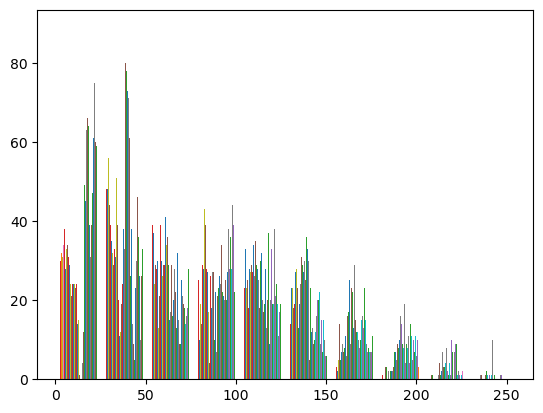

In [34]:
plt.hist(cat_image[:, :, 0]) # make histogram for each column (275 histograms) because it is multidimentional

In [53]:
# make one dimentional array
one_dimentional_image_r = cat_image[:, :, 0].ravel()
one_dimentional_image_g = cat_image[:, :, 1].ravel() 
one_dimentional_image_b = cat_image[:, :, 2].ravel() 

In [54]:
one_dimentional_image_r.shape

(50325,)

In [55]:
cat_image.shape[:2]

(183, 275)

In [56]:
183 * 275

50325

In [58]:
two_dimentional_image_r = cat_image[:, :, 0].reshape(-1, 1) # make two dimentional array

In [60]:
two_dimentional_image_r.shape

(50325, 1)

Make histogram for red channel:

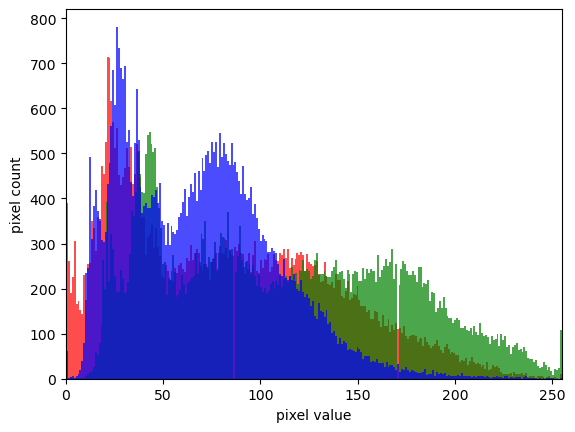

In [67]:
plt.hist(one_dimentional_image_r, bins = 256, color="r", alpha = 0.7) # pixel values = bins  ->  bar chart
plt.hist(one_dimentional_image_g, bins = 256, color="g", alpha = 0.7) # hist for green channel
plt.hist(one_dimentional_image_b, bins = 256, color="b", alpha = 0.7) # hist for blue channel

plt.xlabel("pixel value")
plt.ylabel("pixel count")

plt.xlim(0, 255)

plt.show()

This histogram shows that the image is very dark (low pixel values ​​-> dark colors)

In [68]:
light_cat_image = imread("felis_taxonomy_cats/domestic-cat/dc (58).jpg")

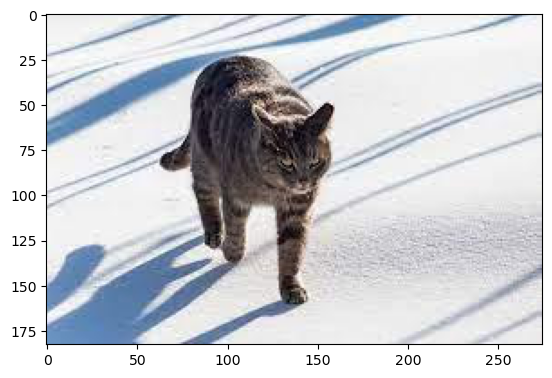

In [71]:
plt.imshow(light_cat_image)

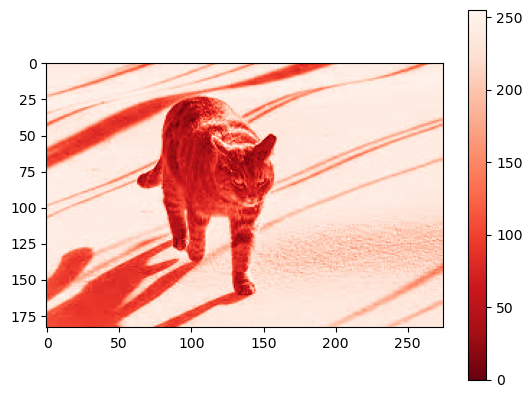

In [72]:
plt.imshow(light_cat_image[:, :, 0], cmap = "Reds_r") # red channel
plt.colorbar()
plt.show()

In [74]:
one_dimentional_light_image_r = light_cat_image[:, :, 0].ravel()
one_dimentional_light_image_g = light_cat_image[:, :, 1].ravel() 
one_dimentional_light_image_b = light_cat_image[:, :, 2].ravel() 

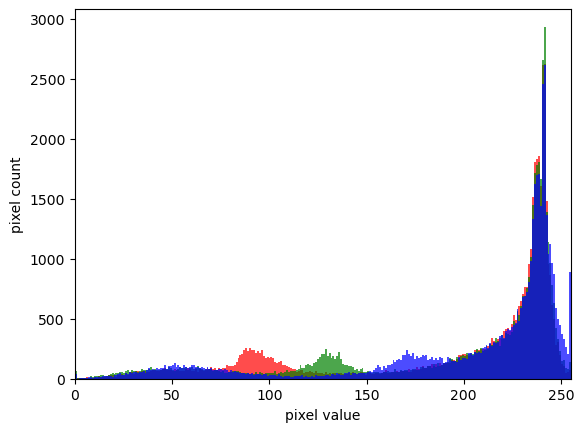

In [75]:
plt.hist(one_dimentional_light_image_r, bins = 256, color="r", alpha = 0.7) # pixel values = bins  ->  bar chart
plt.hist(one_dimentional_light_image_g, bins = 256, color="g", alpha = 0.7) # hist for green channel
plt.hist(one_dimentional_light_image_b, bins = 256, color="b", alpha = 0.7) # hist for blue channel

plt.xlabel("pixel value")
plt.ylabel("pixel count")

plt.xlim(0, 255)

plt.show()

If the pixel values ​​for the different channels overlap, then there is an equal amount of each color (pixel values between 200-250).

## Exploring

In [78]:
mean_by_rows = cat_image.mean(axis = 0)
mean_by_cols = cat_image.mean(axis = 1) 
mean_by_channels = cat_image.mean(axis = 2) 

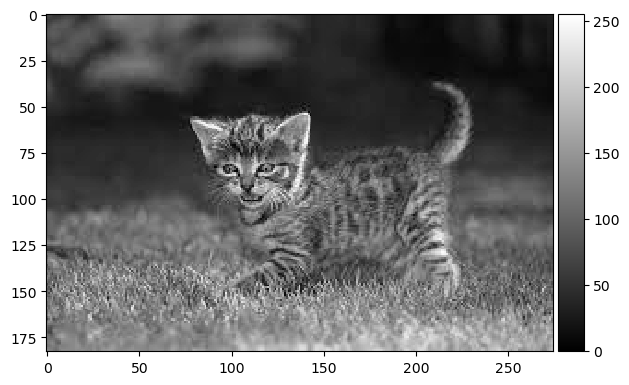

In [84]:
imshow(mean_by_channels, cmap="grey", vmin = 0, vmax = 255)

Coefficients are used, because a person's visual system works differently (we are more sensitive to greens):

In [81]:
red = cat_image[:, :, 0]
green = cat_image[:, :, 1]
blue = cat_image[:, :, 2]

In [82]:
cat_image_grey = 0.299 * red + 0.587 * green + 0.114 * blue

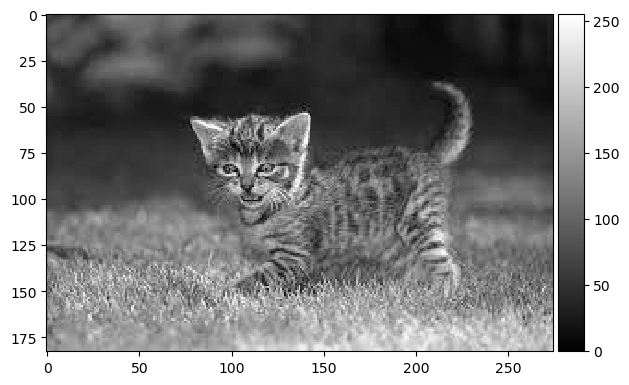

In [87]:
imshow(cat_image_grey, cmap="grey", vmin = 0, vmax = 255) # This image is more detail, clear and distinct:

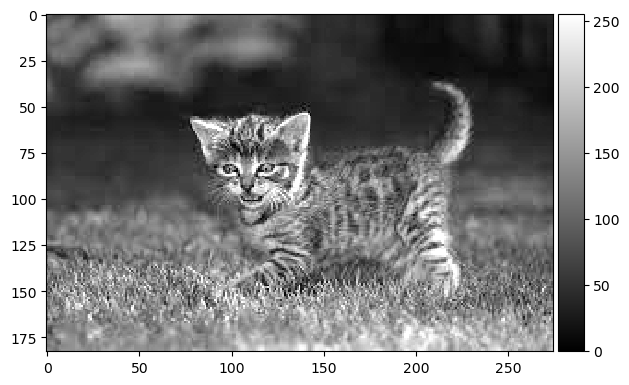

In [90]:
cat_image_grey = 0.299 * red + 0.187 * green + 0.814 * blue
imshow(cat_image_grey, cmap="grey", vmin = 0, vmax = 255) # This image has more contrast:

## Image masking
hide part of the image

In [91]:
masked_cat_image = cat_image.copy()

In [106]:
masked_cat_image[50:110, 70:150] = 0

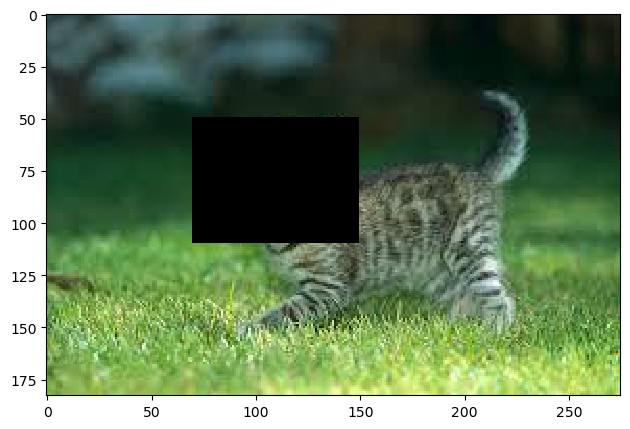

In [107]:
imshow(masked_cat_image)

## Normalization
Data normalization is the process of converting data into the same range. This range often is between 0 and 1.

In [132]:
normalized_cat_image = cat_image / 255.0

In [133]:
normalized_cat_image

array([[[0.25098039, 0.34509804, 0.35294118],
        [0.23137255, 0.3254902 , 0.33333333],
        [0.2       , 0.29411765, 0.30196078],
        ...,
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235]],

       [[0.22745098, 0.32156863, 0.32941176],
        [0.21568627, 0.30980392, 0.31764706],
        [0.19215686, 0.28627451, 0.29411765],
        ...,
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235],
        [0.15294118, 0.16078431, 0.10588235]],

       [[0.19607843, 0.29019608, 0.29803922],
        [0.19215686, 0.28627451, 0.29411765],
        [0.18039216, 0.2745098 , 0.28235294],
        ...,
        [0.14509804, 0.15294118, 0.09803922],
        [0.14509804, 0.15294118, 0.09803922],
        [0.14509804, 0.15294118, 0.09803922]],

       ...,

       [[0.4627451 , 0.6627451 , 0.25098039],
        [0.45882353, 0.65882353, 0.25490196],
        [0.48627451, 0

In [129]:
np.array([blue, green, red]) # swaps the channel order

array([[[ 90,  85,  77, ...,  27,  27,  27],
        [ 84,  81,  75, ...,  27,  27,  27],
        [ 76,  75,  72, ...,  25,  25,  25],
        ...,
        [ 64,  65,  70, ...,  85,  99, 111],
        [ 77,  73,  71, ...,  91, 105, 118],
        [ 85,  80,  75, ...,  95, 109, 121]],

       [[ 88,  83,  75, ...,  41,  41,  41],
        [ 82,  79,  73, ...,  41,  41,  41],
        [ 74,  73,  70, ...,  39,  39,  39],
        ...,
        [169, 168, 172, ..., 201, 215, 227],
        [182, 176, 173, ..., 207, 221, 234],
        [190, 183, 177, ..., 210, 224, 236]],

       [[ 64,  59,  51, ...,  39,  39,  39],
        [ 58,  55,  49, ...,  39,  39,  39],
        [ 50,  49,  46, ...,  37,  37,  37],
        ...,
        [118, 117, 124, ..., 164, 178, 190],
        [131, 125, 125, ..., 172, 186, 199],
        [139, 132, 129, ..., 177, 191, 203]]], dtype=uint8)

In [131]:
# function for normalization:
def min_max_normalization(x, min = 0, max = 1):
    return (x - min) / (np.max(x) - np.min(x))

## Convolution 
Using a small matrix (convolution filter) and a mathematical operation that is applied to images to extract certain features or functions.

It is used for:
- feature extraction (edges, lines, textures, etc.);
- in deep learning (Convolutional Neural Networks) to automatically extract features from images for classification, segmentation and object recognition;
- apply various filters to soften, sharpen or remove noise.

In [147]:
# filter that makes blur:
conv_filter = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1],
])

In [150]:
result = convolve2d(cat_image[:, :, 0], conv_filter, mode = "same")

In [151]:
result.min(), result.max()

(0, 2170)

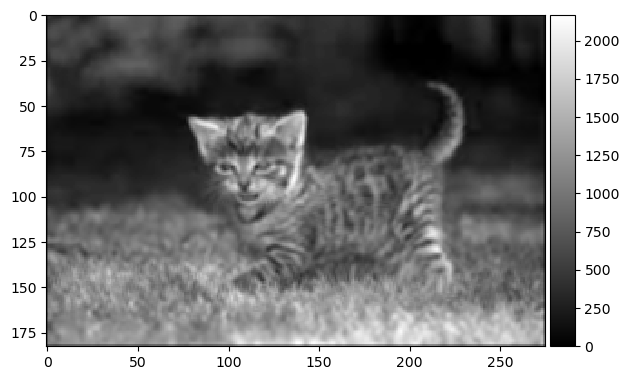

In [152]:
imshow(result, cmap = "grey") 

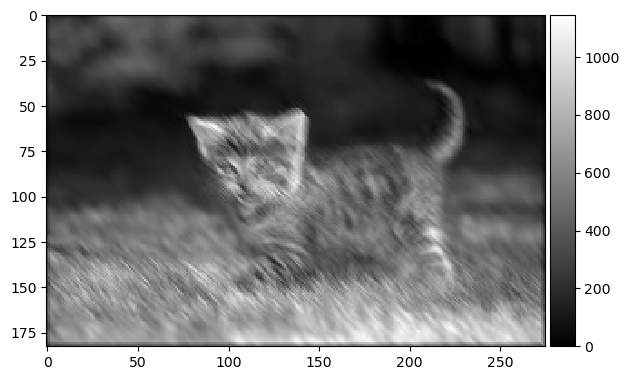

In [155]:
# filter that blurs diagonally:
conv_filter = np.array([
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0],    
    [0, 0, 0, 0, 1],
])
result1 = convolve2d(cat_image[:, :, 0], conv_filter, mode = "same")
imshow(result1, cmap = "grey")

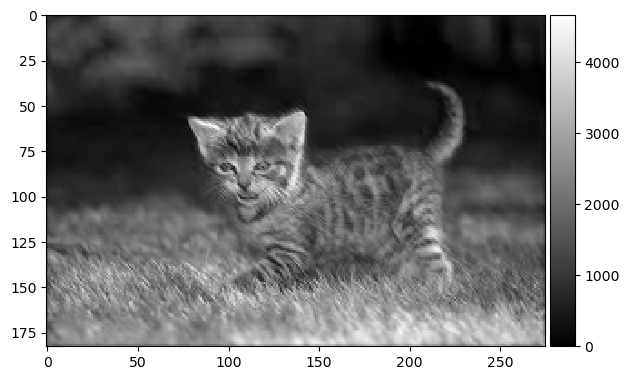

In [157]:
# filter that blurs diagonally, without blurring in the center:
conv_filter = np.array([
    [1, 0, 0, 0, 0],
    [0, 3, 0, 0, 0],
    [0, 0, 11, 0, 0],
    [0, 0, 0, 3, 0],    
    [0, 0, 0, 0, 1],
])
result3 = convolve2d(cat_image[:, :, 0], conv_filter, mode = "same")
imshow(result3, cmap = "grey")

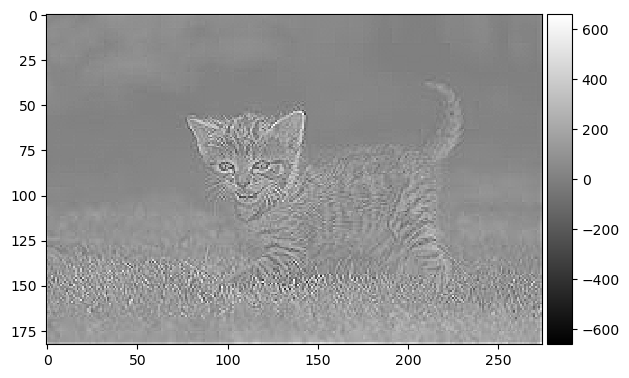

In [161]:
# filter that makes image sharper:
conv_filter = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

result4 = convolve2d(cat_image[:, :, 0], conv_filter, mode = "same")
imshow(result5, cmap = "grey")

## Morphology

A set of operations (erosion, dilation, opening, closing) that process images based on their shapes and structures. These operations are often applied to binary (black and white) images, but it can be applied to grey images. Morphology is used to: 
- Remove noise from images;
- Isolating and finding specific structures and shapes;
- Improving the quality of images;

In [179]:
binary_cat_image = cat_image.copy()

In [170]:
cat_image.mean()

86.89094883258818

In [171]:
binary_cat_image[binary_cat_image < 87] = 0 # make all pixels < 87 (darker than mean) black (0)
binary_cat_image[binary_cat_image >= 87] = 255 # make all pixels > 87 (lighter than mean) white (255)

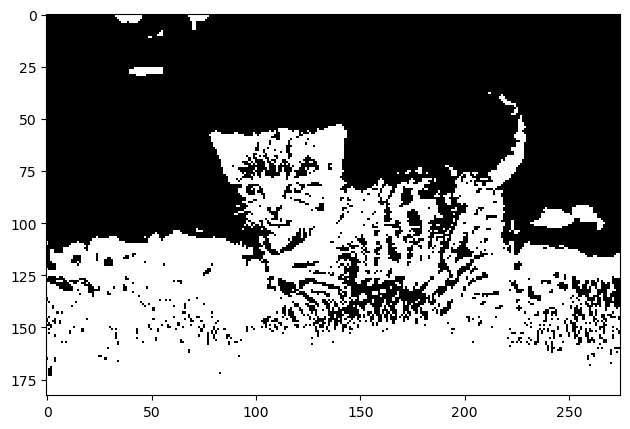

In [174]:
imshow(binary_cat_image[:, :, 0], cmap = "grey")
plt.show()

In [180]:
# 'levels' in photoshop:
binary_cat_image[binary_cat_image < 50] = 0 
binary_cat_image[binary_cat_image >= 205] = 255

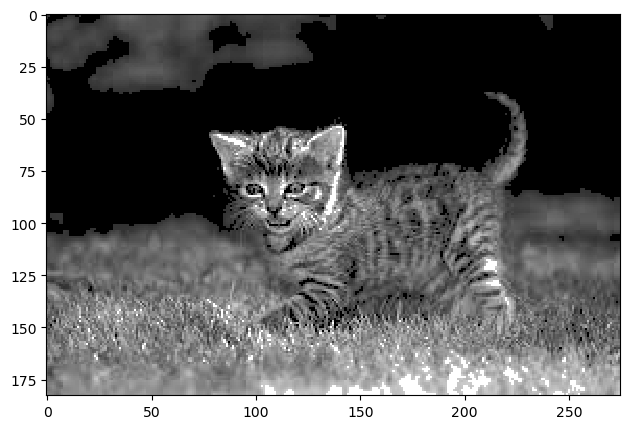

In [181]:
imshow(binary_cat_image[:, :, 0], cmap = "grey")
plt.show()

In [187]:
threshold_otsu(cat_image[:, :, 0])

88

In [191]:
threshold_otsu(all_domestic_cats[57][:, :, 0])

156

In [194]:
cat_56_binary = all_domestic_cats[57].copy()[:, :, 0]

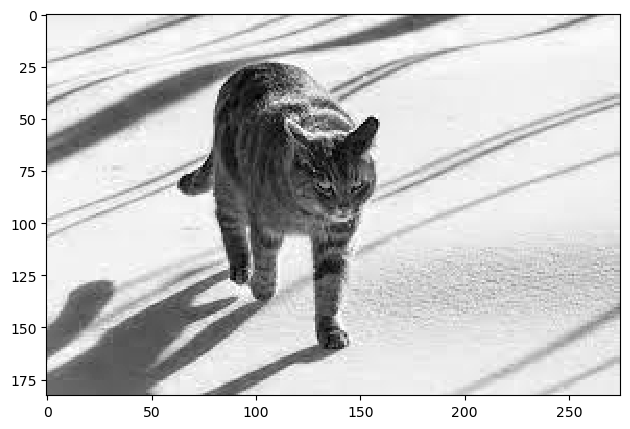

In [195]:
imshow(cat_56_binary)

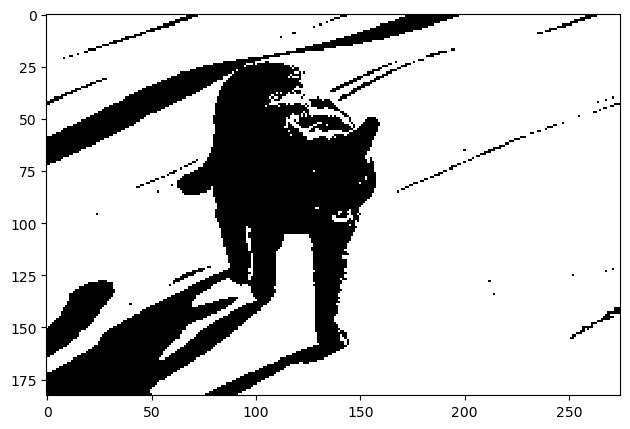

In [196]:
cat_56_binary[cat_56_binary < 156] = 0 
cat_56_binary[cat_56_binary >= 156] = 255
imshow(cat_56_binary)

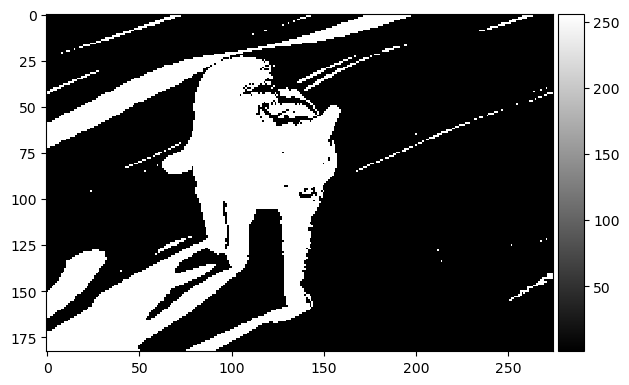

In [207]:
imshow(256 - cat_56_binary, cmap = "grey")

## Arithmetic operations on images

### Addition

In [217]:
result = all_domestic_cats[0].astype(int) + all_domestic_cats[1].astype(int)

In [218]:
result.min(), result.max()

(9, 499)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


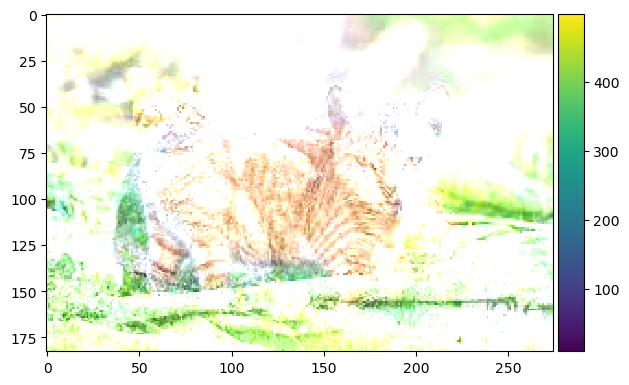

In [219]:
imshow(result)

In [222]:
result1 = 0.5 * all_domestic_cats[0].astype(int) + 0.5 * all_domestic_cats[1].astype(int)

In [223]:
result1.min(), result1.max()

(4.5, 249.5)

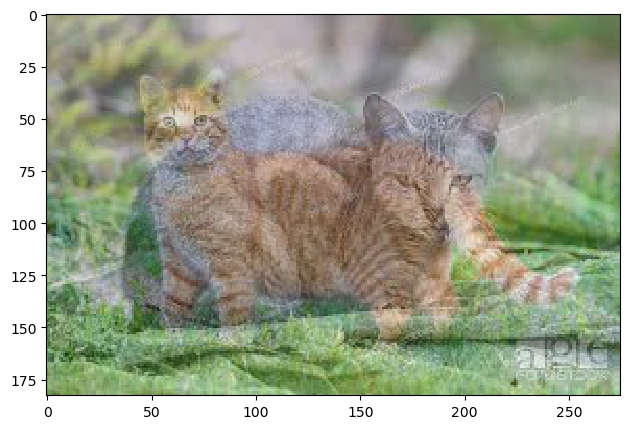

In [226]:
imshow(result1.astype("uint8"))

### Geomertic operations

In [234]:
resized_cat_image = resize(cat_image, (500, 500), order = 3)

In [235]:
resized_cat_image.shape

(500, 500, 3)

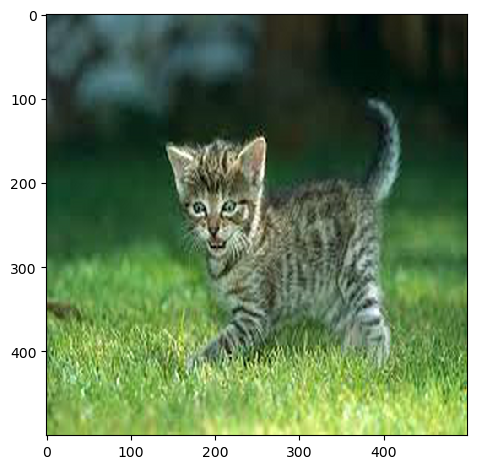

In [236]:
imshow(resized_cat_image)

In [237]:
rotate_cat_image = rotate(cat_image, 50)

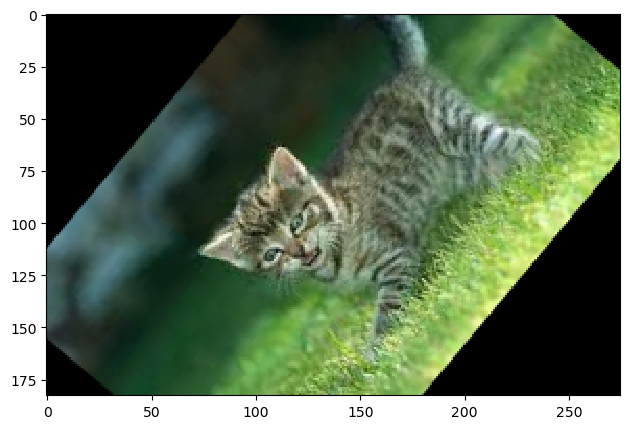

In [238]:
imshow(rotate_cat_image)

In [242]:
# fourier transform
fft2(cat_image[:, :, 0]).shape

(183, 275)

In [243]:
fft2(cat_image[:, :, 0]) # matrix of complex numbers

array([[ 4.09208900e+06      -0.j        ,
        -3.22262915e+05  -64604.31124402j,
         3.88325282e+03  +90480.71114919j, ...,
        -8.75023195e+04 +137436.10755022j,
         3.88325282e+03  -90480.71114919j,
        -3.22262915e+05  +64604.31124402j],
       [ 2.86641655e+05+1245546.77115593j,
         1.07931956e+05   -7246.46947157j,
        -1.41496730e+04 -230360.58851019j, ...,
         2.26238642e+04  -62615.35490966j,
        -6.52676210e+04  +44090.28518723j,
         2.62489123e+05 +164797.03227088j],
       [ 2.85417348e+05 +474722.29392137j,
        -2.40906903e+05  -36504.96299477j,
        -2.02547395e+04  +53681.15672406j, ...,
        -8.80019786e+04  +12475.77416205j,
         1.76889534e+05  -14798.97891804j,
        -2.85603060e+04 -244136.66619311j],
       ...,
       [ 8.33501581e+04 -330039.735409j  ,
         1.82263077e+05  -14936.59440176j,
        -5.66988017e+04  +67062.84336213j, ...,
        -5.79279353e+04  +10164.44829876j,
         3.51962893

In [244]:
fftshift(fft2(cat_image[:, :, 0]))

array([[  695.05324429 +356.66837233j,  1676.69391103 +378.02819553j,
          624.40351846 -728.4800673j , ...,
          183.17355755+1018.03806488j,  -234.33695557+1328.9075511j ,
         1988.12638703+1036.6435046j ],
       [  199.22044879+1879.20305796j,   173.97967035+1896.883612j  ,
         1691.18565781-1506.14372095j, ...,
        -2912.9629372 +1331.14722949j,   924.86236554 +822.07364332j,
        -1220.61717103 +453.41342251j],
       [-2119.9869582  +635.30723448j,  -302.8581566  -361.49818836j,
         -236.65535991+1838.66820455j, ...,
          374.62172957-1422.38519151j, -1484.25166642 -353.12743154j,
         -466.47266338 +683.95680034j],
       ...,
       [ -466.47266338 -683.95680034j, -1484.25166642 +353.12743154j,
          374.62172957+1422.38519151j, ...,
         -236.65535991-1838.66820455j,  -302.8581566  +361.49818836j,
        -2119.9869582  -635.30723448j],
       [-1220.61717103 -453.41342251j,   924.86236554 -822.07364332j,
        -2912.9629372 

In [246]:
# np.abs for complex numbers returns module of number
np.abs(-3j)

3.0

In [248]:
fft_amplitudes = np.abs(fftshift(fft2(cat_image[:, :, 0])))

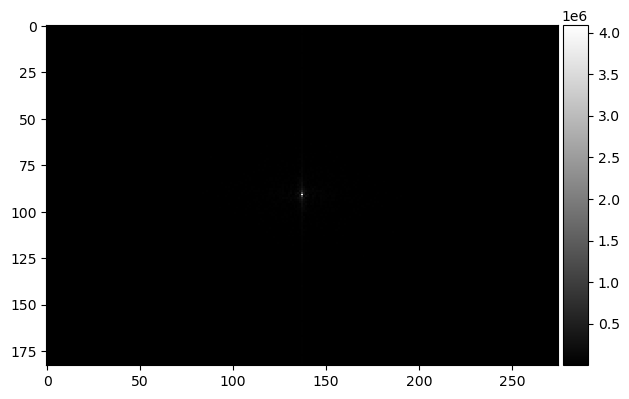

In [250]:
imshow(fft_amplitudes, cmap = "grey")

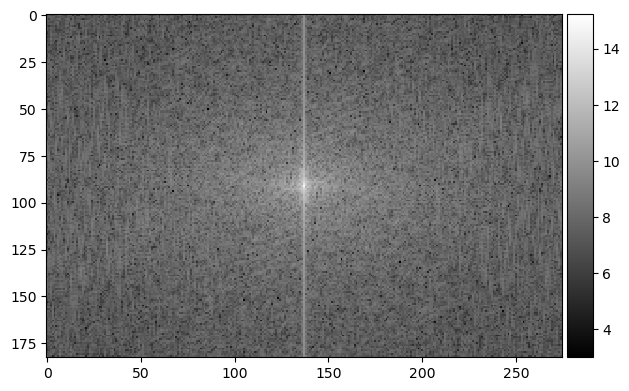

In [252]:
imshow(np.log(fft_amplitudes), cmap = "grey")

## Create a table of images

In [270]:
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
# import tensorflow as tf
# from tensorflow.keras.models import Model

In [258]:
cat_image3 = imread("felis_taxonomy_cats/domestic-cat/dc (27).jpg")

In [260]:
cat_image.shape, light_cat_image.shape, cat_image3.shape # the images have a different shape

((183, 275, 3), (183, 275, 3), (225, 225, 3))

In [277]:
# model = ResNet50()

# cat_image = resize(cat_image, (224, 224))
# light_cat_image = resize(light_cat_image, (224, 224))
# cat_image3 = resize(cat_image3, (224, 224))

# cat_image = preprocess_input(cat_image)
# light_cat_image = preprocess_input(light_cat_image)
# cat_image3 = preprocess_input(cat_image3)

# prediction = model.predict(tf.expand_dims(cat_image, axis = 0))
# prediction = prediction[0]
# prediction.shape # (1, 1000) 

# np.max(prediction)
# np.argmax(prediction)
# decode_predictions(np.array([prediction]))

# model.layers[-2].output # all layers withou last 2

# feature_extractor = Model(inputs = model.inputs, outputs = model.layers[-2].output) 

# result = feature_extractor.predict(tf.expand_dims(cat_image, axis = 0)))
# result.shape # vector with 2048 numbers (1, 2048)

# result2 = feature_extractor.predict(np.array([cat_image, light_cat_image, cat_image3]))
# result2.shape # (3, 2048)

# # check for similarity between images:
# from numpy import dot
# from numpy.linalg import norm

# cos_sim = lambda a, b: dot(a, b) / (norm(a) * norm(b))

# cos_sim(result1[0], result1[1]) # 0,5045

# cos_sim(result1[0], result1[2]) # 0,5107

# cos_sim(result1[1], result1[2]) # 0,9957 - these images are similar